<a href="https://colab.research.google.com/github/tuanymariiah/data_analysis/blob/main/analisando_dados_de_120_anos_de_olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apresentação do Conjunto de Dados
O conjunto de dados utilizado foi retirado do kaggle, mais infomações neste  [link](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set()


In [ ]:
#base='/content/drive/MyDrive/Projetos Pessoais/Portifólio/P[02] - analisando dados de 120 anos de olimpiadas/athlete_events.csv'
base = 'https://raw.githubusercontent.com/tuanymariiah/data_analysis/main/Bases/athlete_events.csv?token=AG2B7L63YEX3STJCJ53PRJLBBXY4Y'
base_olimpiadas = pd.read_csv(base)
base_olimpiadas = base_olimpiadas[base_olimpiadas['Season']=='Summer']
base_olimpiadas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


Cálculo de quantas colunas possuem valores nulos

Como podemos ver 4 colunas possuem valore nulos (ou vazios), são elas: 
* Age (idade)
* Height(Algura)
* Weight(Peso)
* Medal(medalhas)

Para solucionar esse problema temos algumas alternativas, substituir os cantos que nao possuem, pela média ou pela moda.
O atributo idade, podemos atribuir algum valor como por exemplo, **-1.**
E isso poderá afetar negativamente nosso modelo, mas nada como um balanceamento não resolva.


In [ ]:
base_olimpiadas.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64

In [ ]:
base_olimpiadas['Age'].fillna(base_olimpiadas['Age'].mean(), inplace=True)
base_olimpiadas.dropna(subset=['Height', 'Weight'], inplace=True)

#base_olimpiadas['Weight'].dropna(inplace=True)
base_olimpiadas['Medal'].fillna(-1, inplace=True)#preferi substituir por -1


com mais nenhum valor nulo presente em nosso conjunto data set, vamos analisar esta base, para isso tracei alguns pontos:

* A quantidade de mulheres e de homens que competiram nas olimpíadas

* A idade desses competidores

* Quantas mulheres e homens obtiveram medalhas, sejam ela ouro, prata ou bronze

* Pessoa mais jovem e mais velha a ganhar uma medalha

* A historia fala que as olimpiadas de 1916 nunca aconteceram, devido a segunda guerra mundial, vamos verr o que os dados falam sobre isso.

**ajustar mais depois...**

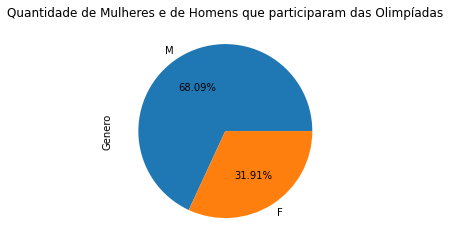

In [ ]:
base_olimpiadas['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%');
plt.title('Quantidade de Mulheres e de Homens que participaram das Olimpíadas');
plt.ylabel('Genero');

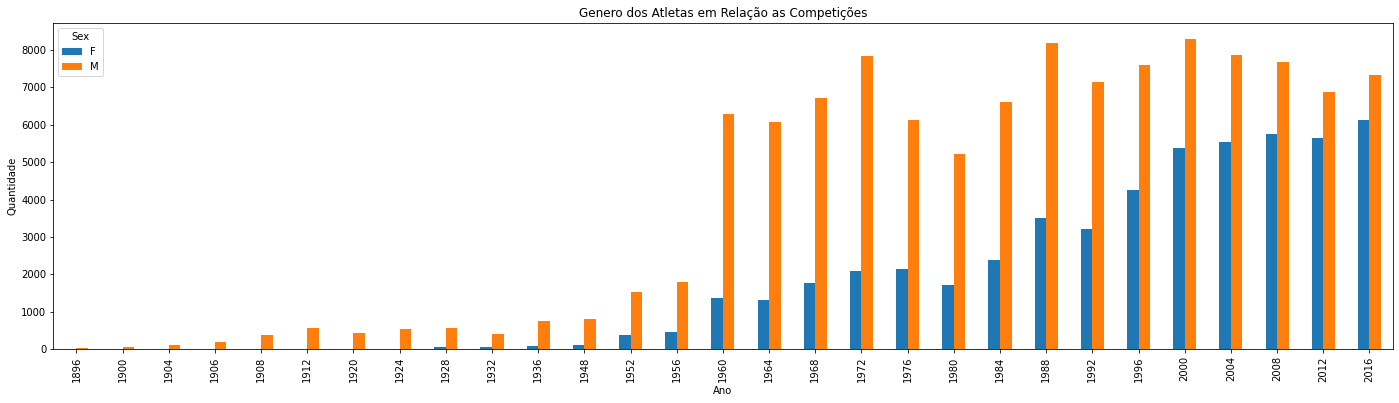

In [ ]:
grupo_ano_genero = base_olimpiadas.groupby(['Year', 'Sex'])

grupo_ano_genero['ID'].count().unstack().plot(kind='bar', title='Genero dos Atletas em Relação as Competições', figsize=[24, 6]);
plt.xlabel('Ano');
plt.ylabel('Quantidade');


como podemos ver, os homens participaram de mais olimpíadas que as mulheres, chegando a 73%, isso se deve ao fato historico também pois apenas em 1900 as mulheres puderam participar dos jogos olímpicos. No Brasil, a primeira mulher a participar de uma olimpíada foi Maria Emma Hulga Lenk Zigler, conhecida como **Maria Lenk**, em 1928, na natação, mas infelizmente a medalha não veio. A primeira meldalha veio apenas nos jogos de atlanta em 1996, no volei de praia.

Vamos  ver o que os dados dizem a respeito disso?

In [ ]:
base_olimpiadas[base_olimpiadas['Name']=='Maria Emma Hulda Lenk Zigler']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


Como podemos ver, Maria Lenk, participou de apenas 2 olimpíadas, Los Angeles e Berlin.

Ainda vendo a quantidade de mulheres presentes em olimpíadas, no trecho de código abaixo, podemos ver que nas olimpiadas de 1896 as mulheres nao puderam competir, mas já nas olimpiadas de 1900 já podemos ver a presença das mulheres, yeeeeah!

In [ ]:
print(base_olimpiadas[base_olimpiadas['Year']==1896]['Sex'].value_counts());
print(base_olimpiadas[base_olimpiadas['Year']==1900]['Sex'].value_counts());

M    43
Name: Sex, dtype: int64
M    72
Name: Sex, dtype: int64


É estranho observar que tem uma pessoa idosa e morta participando de uma olimpíadas, mas a historia mostra que, John Quincy Adams Ward, faleceu em 1910 com 84 anos e participou das olimpiadas com 97. Mas o fato é que depois sua morte, apenas os quadros conservados participaram das olimpiadas de 1928. Interessante...!

In [ ]:
base_olimpiadas[base_olimpiadas['Age']==base_olimpiadas['Age'].max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
97374,49287,Hiroshi Hoketsu,M,71.0,168.0,62.0,Japan,JPN,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Dressage, Individual",-1


Também é estranho ver que uma pessoa com apenas 10 anos de idade participou das olimpíadas. Foi o que aconteceu com o jovem Dimitrios Loundras.

In [ ]:
base_olimpiadas[base_olimpiadas['Age']==base_olimpiadas['Age'].min()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
252230,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,-1
252231,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,-1
252232,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Individual Medley,-1
252233,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 4 x 100 metres Medley Relay,-1


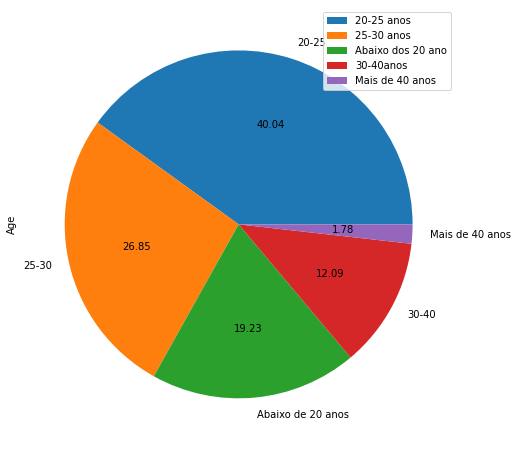

In [ ]:
faixa_etaria = pd.cut(base_olimpiadas.Age, bins=[0, 20, 25, 30, 40, 100], labels=['Abaixo de 20 anos', '20-25', '25-30', '30-40', 'Mais de 40 anos'])
faixa_etaria.value_counts().plot(kind='pie',autopct='%.2f', figsize=[8, 8]);
plt.legend(['20-25 anos', '25-30 anos','Abaixo dos 20 ano','30-40anos','Mais de 40 anos'],loc= 'upper right');


In [ ]:
base_olimpiadas[['Sex','Medal']].value_counts()#.plot(kind='bar')

Sex  Medal 
M    -1        97271
F    -1        44734
M    Gold       5668
     Bronze     5652
     Silver     5371
F    Bronze     2920
     Gold       2875
     Silver     2870
dtype: int64

Assim como a participacao das mulheres foram muito poucas, isso é refletido para o quadro de medalhas obtido durante o tempo.
O genero masculino obtiveram proporcionalmente a quantidade de medalhas cerca de 8mil e as mulheres cerca de 3mil medalhas sendo divididas em ouro, prata e bronze, para os jogos olimpicos de verao. Essa proporcao se manteve para os joos de inverno

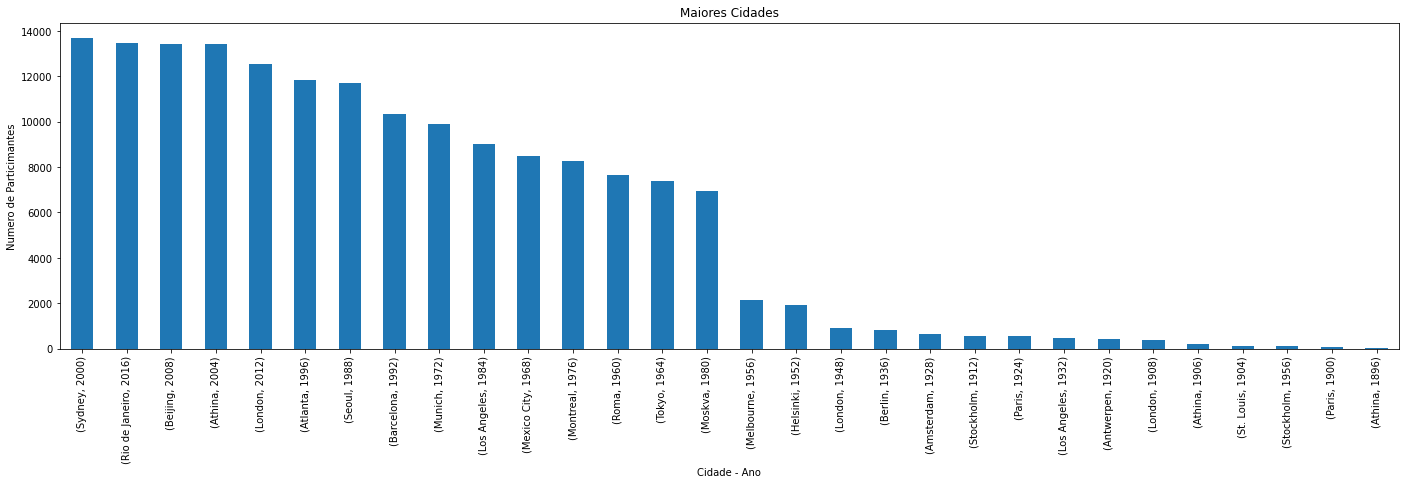

In [ ]:
grupodecidades = base_olimpiadas.groupby(['City', 'Year'])['City'].count()
grupodecidades.nlargest(50).plot(kind='bar', title='Maiores Cidades',figsize=(24, 6));
plt.ylabel('Numero de Particimantes');
plt.xlabel('Cidade - Ano');

A seguir podemos ver a quantidade de atletas brasileiros e seus respectivos espeortes, com o gráfico abaixo, podemos ver existe uma maior quantidade de atletas da natação e de atletismo são bastants frequentes, seguidos do vôlei e futebol, mas veja... é so a participaçao e não a premiação em olimpíadas

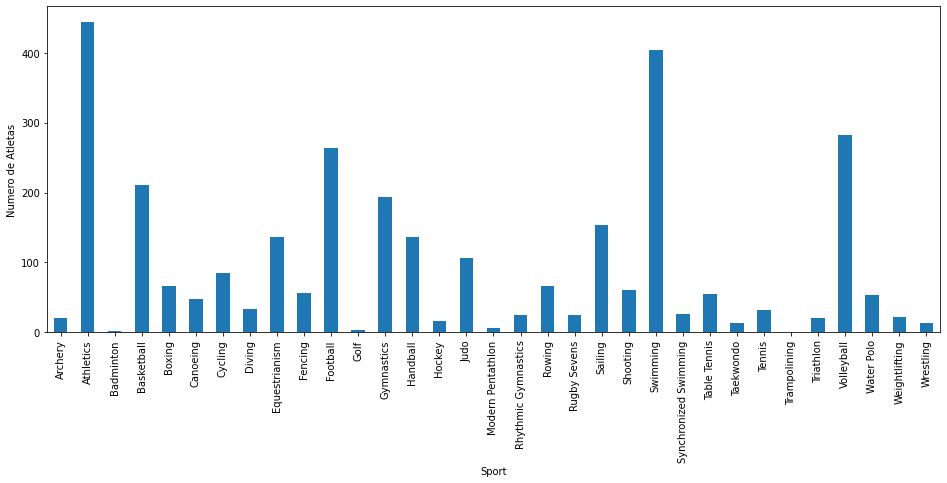

In [ ]:
#
natacao_pais = base_olimpiadas.groupby(['Team', 'Sport'])['Team'].count()
natacao_pais.Brazil.plot(kind='bar',figsize=(16, 6))
plt.ylabel('Numero de Atletas');

Ao decorrer das olimpíadas, foram concedidas ao todo quantas medalhas?

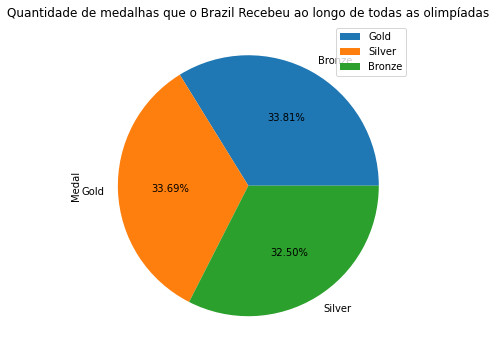

In [ ]:
base_olimpiadas[base_olimpiadas['Medal']!=-1]['Medal'].value_counts().plot(kind='pie',title='Quantidade de medalhas que o Brazil Recebeu ao longo de todas as olimpíadas',autopct='%.2f%%', figsize=[6, 6]);

plt.legend(['Gold', 'Silver','Bronze'],loc= 'upper right');


E por gênero, quantas medalhas tantos os homens quanto as mulheres receberam?

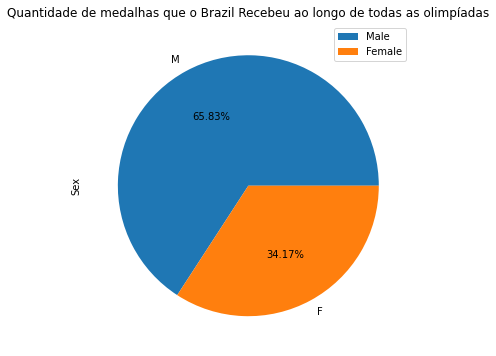

In [ ]:
base_olimpiadas[base_olimpiadas['Medal']!=-1]['Sex'].value_counts().plot(kind='pie',title='Quantidade de medalhas que o Brazil Recebeu ao longo de todas as olimpíadas',autopct='%.2f%%', figsize=[6, 6]);

plt.legend(['Male', 'Female'],loc= 'upper right');


De acordo com o gráfico, podemos ver que a quantidade de mulheres e de homens que receberam medalhas ao longo das olimpíadas, se assemelha a quantidade de homens e mulheres que marcaram presença nas olimpíadas

Observando o dataset, podemos ver que existem dois atributos, altura e peso. Que a partir deles podemos fazer o cálcudo do imc, que é calculado da seguinte forma:

IMC = peso/ altura*altura

In [ ]:
base_olimpiadas['Height'] = base_olimpiadas['Height'].astype(int)
base_olimpiadas['Weight'] = base_olimpiadas['Weight'].astype(int)

def calcula_imc(registro):
  return registro['Weight']/(registro['Height']*registro['Height'])*10000
   
base_olimpiadas['IMC'] = base_olimpiadas.apply(calcula_imc, axis=1)


Uma vez que calculamos o IMC dos Atletas, também vimos a faixa de cada valor como Magreza, Normal, Sobrepeso e Obesidadde segundo o site [Tua Saude](https://www.tuasaude.com/calculadora/imc/)

In [ ]:
def faixaimc(registro):
    if registro['IMC'] < 18.5:
        return 'Magreza'
    elif registro['IMC'] >=18.5 and registro['IMC']<24.9:
        return 'Normal'
    elif registro['IMC'] >=24.9 and registro['IMC']<30:
        return 'Sobrepeso'
    elif registro['IMC'] >=30:
        return 'Obesidade'


base_olimpiadas['Faixa_IMC'] = base_olimpiadas.apply(faixaimc, axis=1)


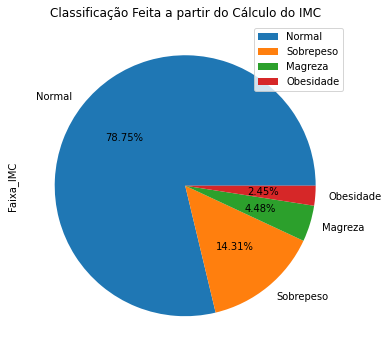

In [ ]:
base_olimpiadas['Faixa_IMC'].value_counts().plot(kind='pie',autopct='%.2f%%',  figsize=[6, 6]);
plt.title('Classificação Feita a partir do Cálculo do IMC');
plt.legend(['Normal', 'Sobrepeso','Magreza','Obesidade']);


Agora seria legal investigar em quais esportes possuem atletas obesos

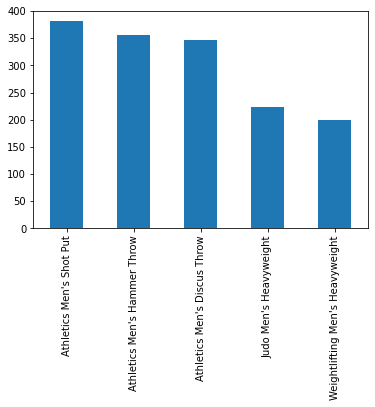

In [ ]:
base_olimpiadas[base_olimpiadas['Faixa_IMC']=='Obesidade']['Event'].value_counts().head().plot(kind='bar')

De acordo com o grafico apresentado, os atletas que possuem obesidade, so os atletas que pertencem aos esportes como judo, levantamento de peso, lancamento de discos e arremesso de peso

